In [ ]:
!wget https://raw.githubusercontent.com/mdhabeebvulla/samples/master/heightweight.csv

--2024-02-10 04:07:05--  https://raw.githubusercontent.com/mdhabeebvulla/samples/master/heightweight.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53 [text/plain]
Saving to: ‘heightweight.csv’

heightweight.csv    100%[===================>]      53  --.-KB/s    in 0s      

2024-02-10 04:07:06 (4.76 MB/s) - ‘heightweight.csv’ saved [53/53]



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('heightweight.csv')

In [ ]:
df.head()

H   W
0  126  78
1  128  80
2  128  82
3  130  82
4  130  84

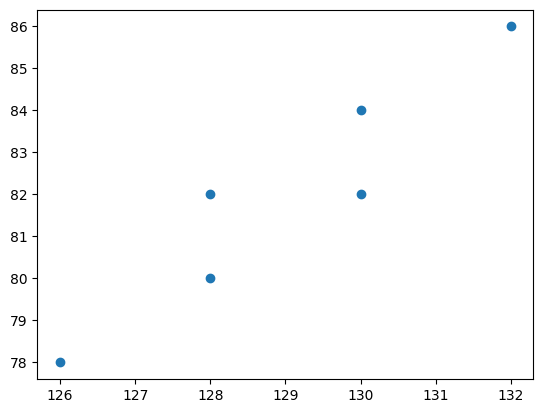

In [ ]:
plt.plot(df['H'],df['W'],'o')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['H_N'] = scaler.fit_transform(df[['H']])
df['W_N'] = scaler.fit_transform(df[['W']])

In [ ]:
df.head()

H   W       H_N       W_N
0  126  78 -1.566699 -1.549193
1  128  80 -0.522233 -0.774597
2  128  82 -0.522233  0.000000
3  130  82  0.522233  0.000000
4  130  84  0.522233  0.774597

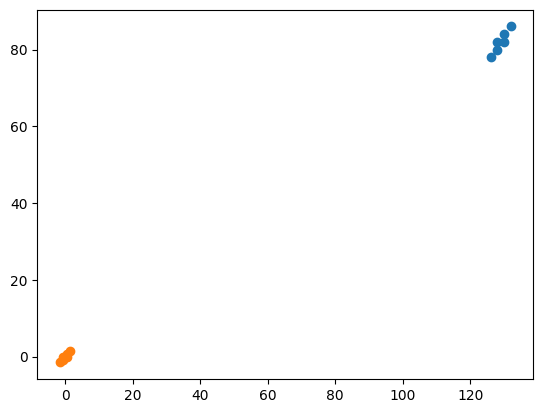

In [ ]:
plt.plot(df['H'],df['W'],'o')
plt.plot(df['H_N'],df['W_N'],'o')
plt.show()

In [ ]:
dfn = df[['H_N','W_N']]

In [ ]:
dfn.head()

H_N       W_N
0 -1.566699 -1.549193
1 -0.522233 -0.774597
2 -0.522233  0.000000
3  0.522233  0.000000
4  0.522233  0.774597

In [ ]:
cvmat = np.cov(dfn.T)
cvmat

array([[1.2       , 1.13265577],
       [1.13265577, 1.2       ]])

In [ ]:
#Eigen Values
from sympy import Eq,symbols,expand
x = symbols('x')
eq = (((1.2-x) ** 2)-(1.13)**2)

In [ ]:
eqn =expand(eq)
eqn

1.0*x**2 - 2.4*x + 0.1631

In [ ]:
cof = [1,-2.4,0.16]
np.roots(cof)

array([2.33137085, 0.06862915])

In [ ]:
1.1/1.13

0.9734513274336285

In [ ]:
0.97/np.sqrt(1+(0.97)**2)

0.6962579294579282

In [ ]:
v = np.array([[0.71,0.69],[0.70,-0.72]])

In [ ]:
v   #[[-0.70710678 -0.70710678]
     #[ 0.70710678 -0.70710678]]

array([[ 0.71,  0.69],
       [ 0.7 , -0.72]])

In [ ]:
proj = dfn @ v
proj

0         1
0 -2.196792  0.034397
1 -0.913003  0.197369
2 -0.370785 -0.360341
3  0.370785  0.360341
4  0.913003 -0.197369
5  2.196792 -0.034397

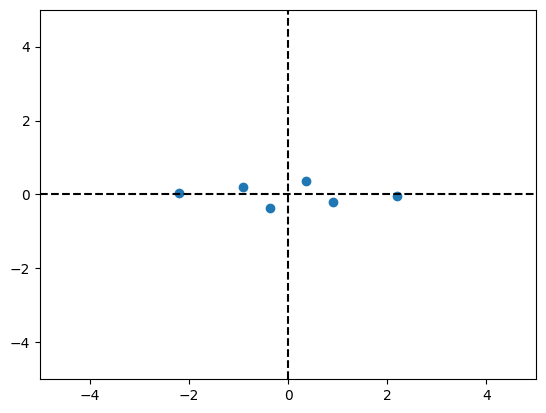

In [ ]:
x = proj[0]
y = proj[1]
plt.scatter(x,y)
plt.axvline(0,c='black',ls='--')
plt.axhline(0,c='black',ls='--')
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.show()

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
data = np.array([
    [126,78],
    [128,80],
    [128,82],
    [130,82],
    [130,84]
])

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
cov_matrix = np.cov(scaled_data,rowvar=False)
cov_matrix

array([[1.25      , 1.11380264],
       [1.11380264, 1.25      ]])

In [ ]:
eigenvalues,eigenvectors = np.linalg.eig(cov_matrix)
print(eigenvalues)
print(eigenvectors)

[0.13619736 2.36380264]
[[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_tr = pca.fit_transform(scaled_data)

In [ ]:
vari = pca.explained_variance_
vari

array([2.36380264, 0.13619736])

In [ ]:
from sklearn.feature_selection import SelectKBest  SL,SW,PL,PW

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
from sklearn.preprocessing import StandardScaler
x_scaled = StandardScaler().fit_transform(X)

In [ ]:
x_scaled.shape

(150, 4)

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd
pca = PCA(n_components=3)
pca_features = pca.fit_transform(x_scaled)
print('Shape before PCA ' ,x_scaled.shape)
print('Shape after PCA ',pca_features.shape)
print(pca_features)

In [ ]:
pca_df = pd.DataFrame(data=pca_features,columns=['PC1','PC2','PC3'])
pca_df.head()

PC1       PC2       PC3
0 -2.264703  0.480027 -0.127706
1 -2.080961 -0.674134 -0.234609
2 -2.364229 -0.341908  0.044201
3 -2.299384 -0.597395  0.091290
4 -2.389842  0.646835  0.015738

In [ ]:
target_names = { 0:'setosa',1:'versicolor',2:'virginica'}

In [ ]:
pca_df['target'] = y
pca_df['target'] = pca_df['target'].map(target_names)

In [ ]:
pca_df.head()

PC1       PC2       PC3  target
0 -2.264703  0.480027 -0.127706  setosa
1 -2.080961 -0.674134 -0.234609  setosa
2 -2.364229 -0.341908  0.044201  setosa
3 -2.299384 -0.597395  0.091290  setosa
4 -2.389842  0.646835  0.015738  setosa

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(pca_features,y,test_size=0.2,random_state = 42)

In [ ]:
svm_c = SVC(kernel='linear')
svm_c.fit(X_train,y_train)
y_pred = svm_c.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)
print('Classification report ',classification_report(y_test,y_pred))

0.9666666666666667
Classification report                precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



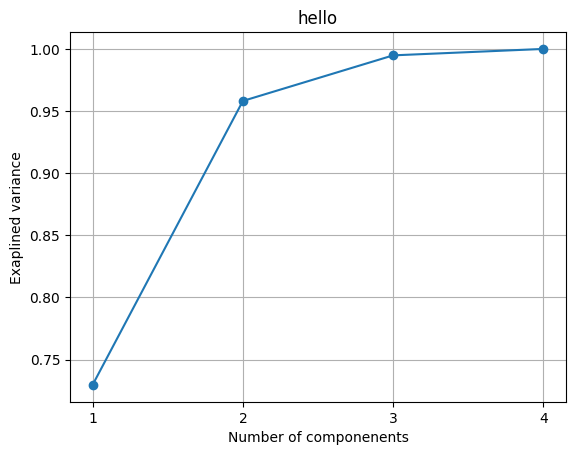

In [ ]:
import matplotlib.pyplot as plt
explained_variance = []
for n in range(1,X.shape[1]+1):
  pca = PCA(n_components=n)
  pca.fit(x_scaled)
  explained_variance.append(sum(pca.explained_variance_ratio_))

plt.plot(range(1,X.shape[1]+1),explained_variance,marker='o')
plt.xlabel('Number of componenents')
plt.ylabel('Exaplined variance')
plt.title('hello')
plt.xticks(range(1,X.shape[1]+1))
plt.grid()
plt.show()

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target
from sklearn.preprocessing import StandardScaler
x_scaled = StandardScaler().fit_transform(X)
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('pca', PCA()),
    ('svm', SVC(kernel='linear'))
])

#
param_grid = {
    'n_components': range(1, X.shape[1] + 1)
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_scaled, y)

print("Best number of components:", grid_search.best_params_['n_components'])

print("Best accuracy:", grid_search.best_score_)

ValueError: Invalid parameter 'n_components' for estimator Pipeline(steps=[('pca', PCA()), ('svm', SVC(kernel='linear'))]). Valid parameters are: ['memory', 'steps', 'verbose'].

In [ ]:
print('best number of components :',grid_search.best_params_['n_components'])
print('best accuracy : ',grid_search.best_score_)